In [190]:
import pandas as pd
import numpy as np

gas = "N2O_CH4"
species = "double"
noise = 0.05

# Load original spectra
df = pd.read_csv(gas + '_spectra_' + species + '.csv', index_col=0)

def add_positive_noise(spectrum, noise_level=noise):
    max_val = spectrum.max()
    noise_amplitude = max_val * noise_level
    noise = np.random.uniform(0, noise_amplitude, size=spectrum.shape)
    return spectrum + noise

# Apply noise row-wise to all spectra
noisy_df = df.apply(add_positive_noise, axis=1)

# Save noisy spectra to CSV
noisy_df.to_csv(gas + '_spectra_' + species + '_noisy.csv')


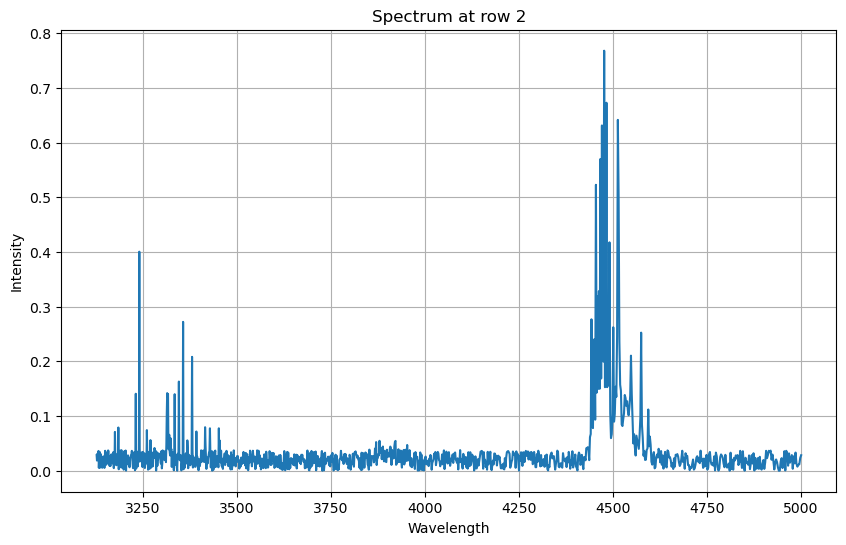

In [191]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

df1 = pd.read_csv(gas + '_spectra_' + species + '.csv', index_col=0)
df2 = pd.read_csv(gas + '_spectra_' + species + '_noisy.csv', index_col=0)

# Select row by iloc (e.g., the 0th spectrum)
row_idx = 2
spectrum = df2.iloc[row_idx]

#spectrum_smooth = savgol_filter(spectrum, window_length=7, polyorder=2)

# Convert column headers (wavelengths) to float for x-axis
wavelengths = df.columns.astype(float)

plt.figure(figsize=(10, 6))
plt.plot(wavelengths, spectrum)
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title(f'Spectrum at row {row_idx}')
plt.grid(True)
plt.show()
